In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import os
from sklearn.impute import SimpleImputer
import missingno as msno

#Access Stored Data
from env import host,db,protocol,password,user,mysqlcon
import wrangle
import env

# Acquire Data
* Used wrangle.get_zillow_data() function to pull data from MySql Workbench, stored it locally, and created the df variable to store the data

* Sourced zillow data dictionary that discribes the dataframe features

In [2]:
#stored the dataframe into a variable
df = wrangle.get_zillow_data()

In [3]:
#stored the sourced zillow_data_dictionary.xlsx into a variable using pd.read_excel to pull the local file 
#into my notebook
dd = pd.read_excel('zillow_data_dictionary.xlsx')

# Data Dictionary

In [4]:
#called the variable 
dd

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


In [5]:
df.head()

,Unnamed: 0,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,propertylandusetypeid,propertylandusedesc,...,zipcode_id,county_id,typeconstructiondesc,structure_taxvalue,typeconstructiontypeid,propertycountylandusecode,propertyzoningdesc,latitude,longitude,transactiondate
0,0,2.0,1.0,1058.0,171289.0,1949.0,2137.34,6037.0,261.0,Single Family Residential,...,96349.0,3101.0,NaN,52597.0,NaN,0100,LAR1,34178486.0,-118520611.0,2017-01-09
1,1,2.0,1.0,802.0,193813.0,1949.0,2516.25,6037.0,261.0,Single Family Residential,...,96349.0,3101.0,NaN,116289.0,NaN,0100,LAR1,34174444.0,-118521592.0,2017-01-09
2,2,2.0,1.0,804.0,150484.0,1949.0,1887.91,6037.0,261.0,Single Family Residential,...,96349.0,3101.0,NaN,90297.0,NaN,0100,LAR1,34174324.0,-118520804.0,2017-01-09
3,3,5.0,4.0,2357.0,493678.0,1950.0,6069.50,6037.0,261.0,Single Family Residential,...,96379.0,3101.0,NaN,233836.0,NaN,0100,LAR1,34175032.0,-118543329.0,2017-01-09
4,4,2.0,1.0,864.0,57522.0,1955.0,849.46,6037.0,261.0,Single Family Residential,...,96379.0,3101.0,NaN,20684.0,NaN,0100,LAR1,34176824.0,-118544136.0,2017-01-09


In [6]:
df.shape

(56078, 24)

In [7]:
df.describe()

,Unnamed: 0,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,propertylandusetypeid,storytypeid,numberofstories,assessmentyear,zipcode_id,county_id,structure_taxvalue,typeconstructiontypeid,latitude,longitude
count,56078.000000,56078.000000,56078.000000,55848.000000,5.607000e+04,55830.000000,5.594900e+04,56078.000000,56078.0,43.0,15493.000000,56078.000000,55978.000000,56078.000000,5.587500e+04,69.0,5.607800e+04,5.607800e+04
mean,28038.500000,3.289169,2.239497,1868.285704,4.576511e+05,1961.186262,5.589363e+03,6048.841792,261.0,7.0,1.384690,2015.998663,96599.100557,2559.397589,1.799424e+05,6.0,3.401649e+07,-1.182070e+08
std,16188.468535,0.958664,1.006977,966.973076,6.635615e+05,21.995171,8.541810e+03,21.237740,0.0,0.0,0.532645,0.045658,4456.352791,787.660580,3.667285e+05,0.0,2.489968e+05,3.527830e+05
min,0.000000,0.000000,0.000000,20.000000,9.000000e+00,1862.000000,8.300000e+00,6037.000000,261.0,7.0,1.000000,2014.000000,95982.000000,1286.000000,5.000000e+00,6.0,3.334071e+07,-1.194484e+08
25%,14019.250000,3.000000,2.000000,1260.000000,1.870265e+05,1949.000000,2.523760e+03,6037.000000,261.0,7.0,1.000000,2016.000000,96193.000000,2061.000000,7.512250e+04,6.0,3.383689e+07,-1.184038e+08
50%,28038.500000,3.000000,2.000000,1630.000000,3.295320e+05,1958.000000,4.130480e+03,6037.000000,261.0,7.0,1.000000,2016.000000,96389.000000,3101.000000,1.237040e+05,6.0,3.401856e+07,-1.181606e+08
75%,42057.750000,4.000000,3.000000,2217.000000,5.335282e+05,1976.000000,6.410560e+03,6059.000000,261.0,7.0,2.000000,2016.000000,96987.000000,3101.000000,2.063965e+05,6.0,3.418136e+07,-1.179497e+08
max,56077.000000,25.000000,20.000000,26345.000000,6.750649e+07,2016.000000,1.195296e+06,6111.000000,261.0,7.0,3.000000,2016.000000,399675.000000,3101.000000,6.640493e+07,6.0,3.480695e+07,-1.175559e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56078 entries, 0 to 56077
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 56078 non-null  int64  
 1   bedrooms                   56078 non-null  float64
 2   bathrooms                  56078 non-null  float64
 3   area                       55848 non-null  float64
 4   tax_value                  56070 non-null  float64
 5   year_built                 55830 non-null  float64
 6   taxamount                  55949 non-null  float64
 7   fips                       56078 non-null  float64
 8   propertylandusetypeid      56078 non-null  float64
 9   propertylandusedesc        56078 non-null  object 
 10  storydesc                  43 non-null     object 
 11  storytypeid                43 non-null     float64
 12  numberofstories            15493 non-null  float64
 13  assessmentyear             56078 non-null  flo

In [9]:
df_sample = df.sample(n=1000)

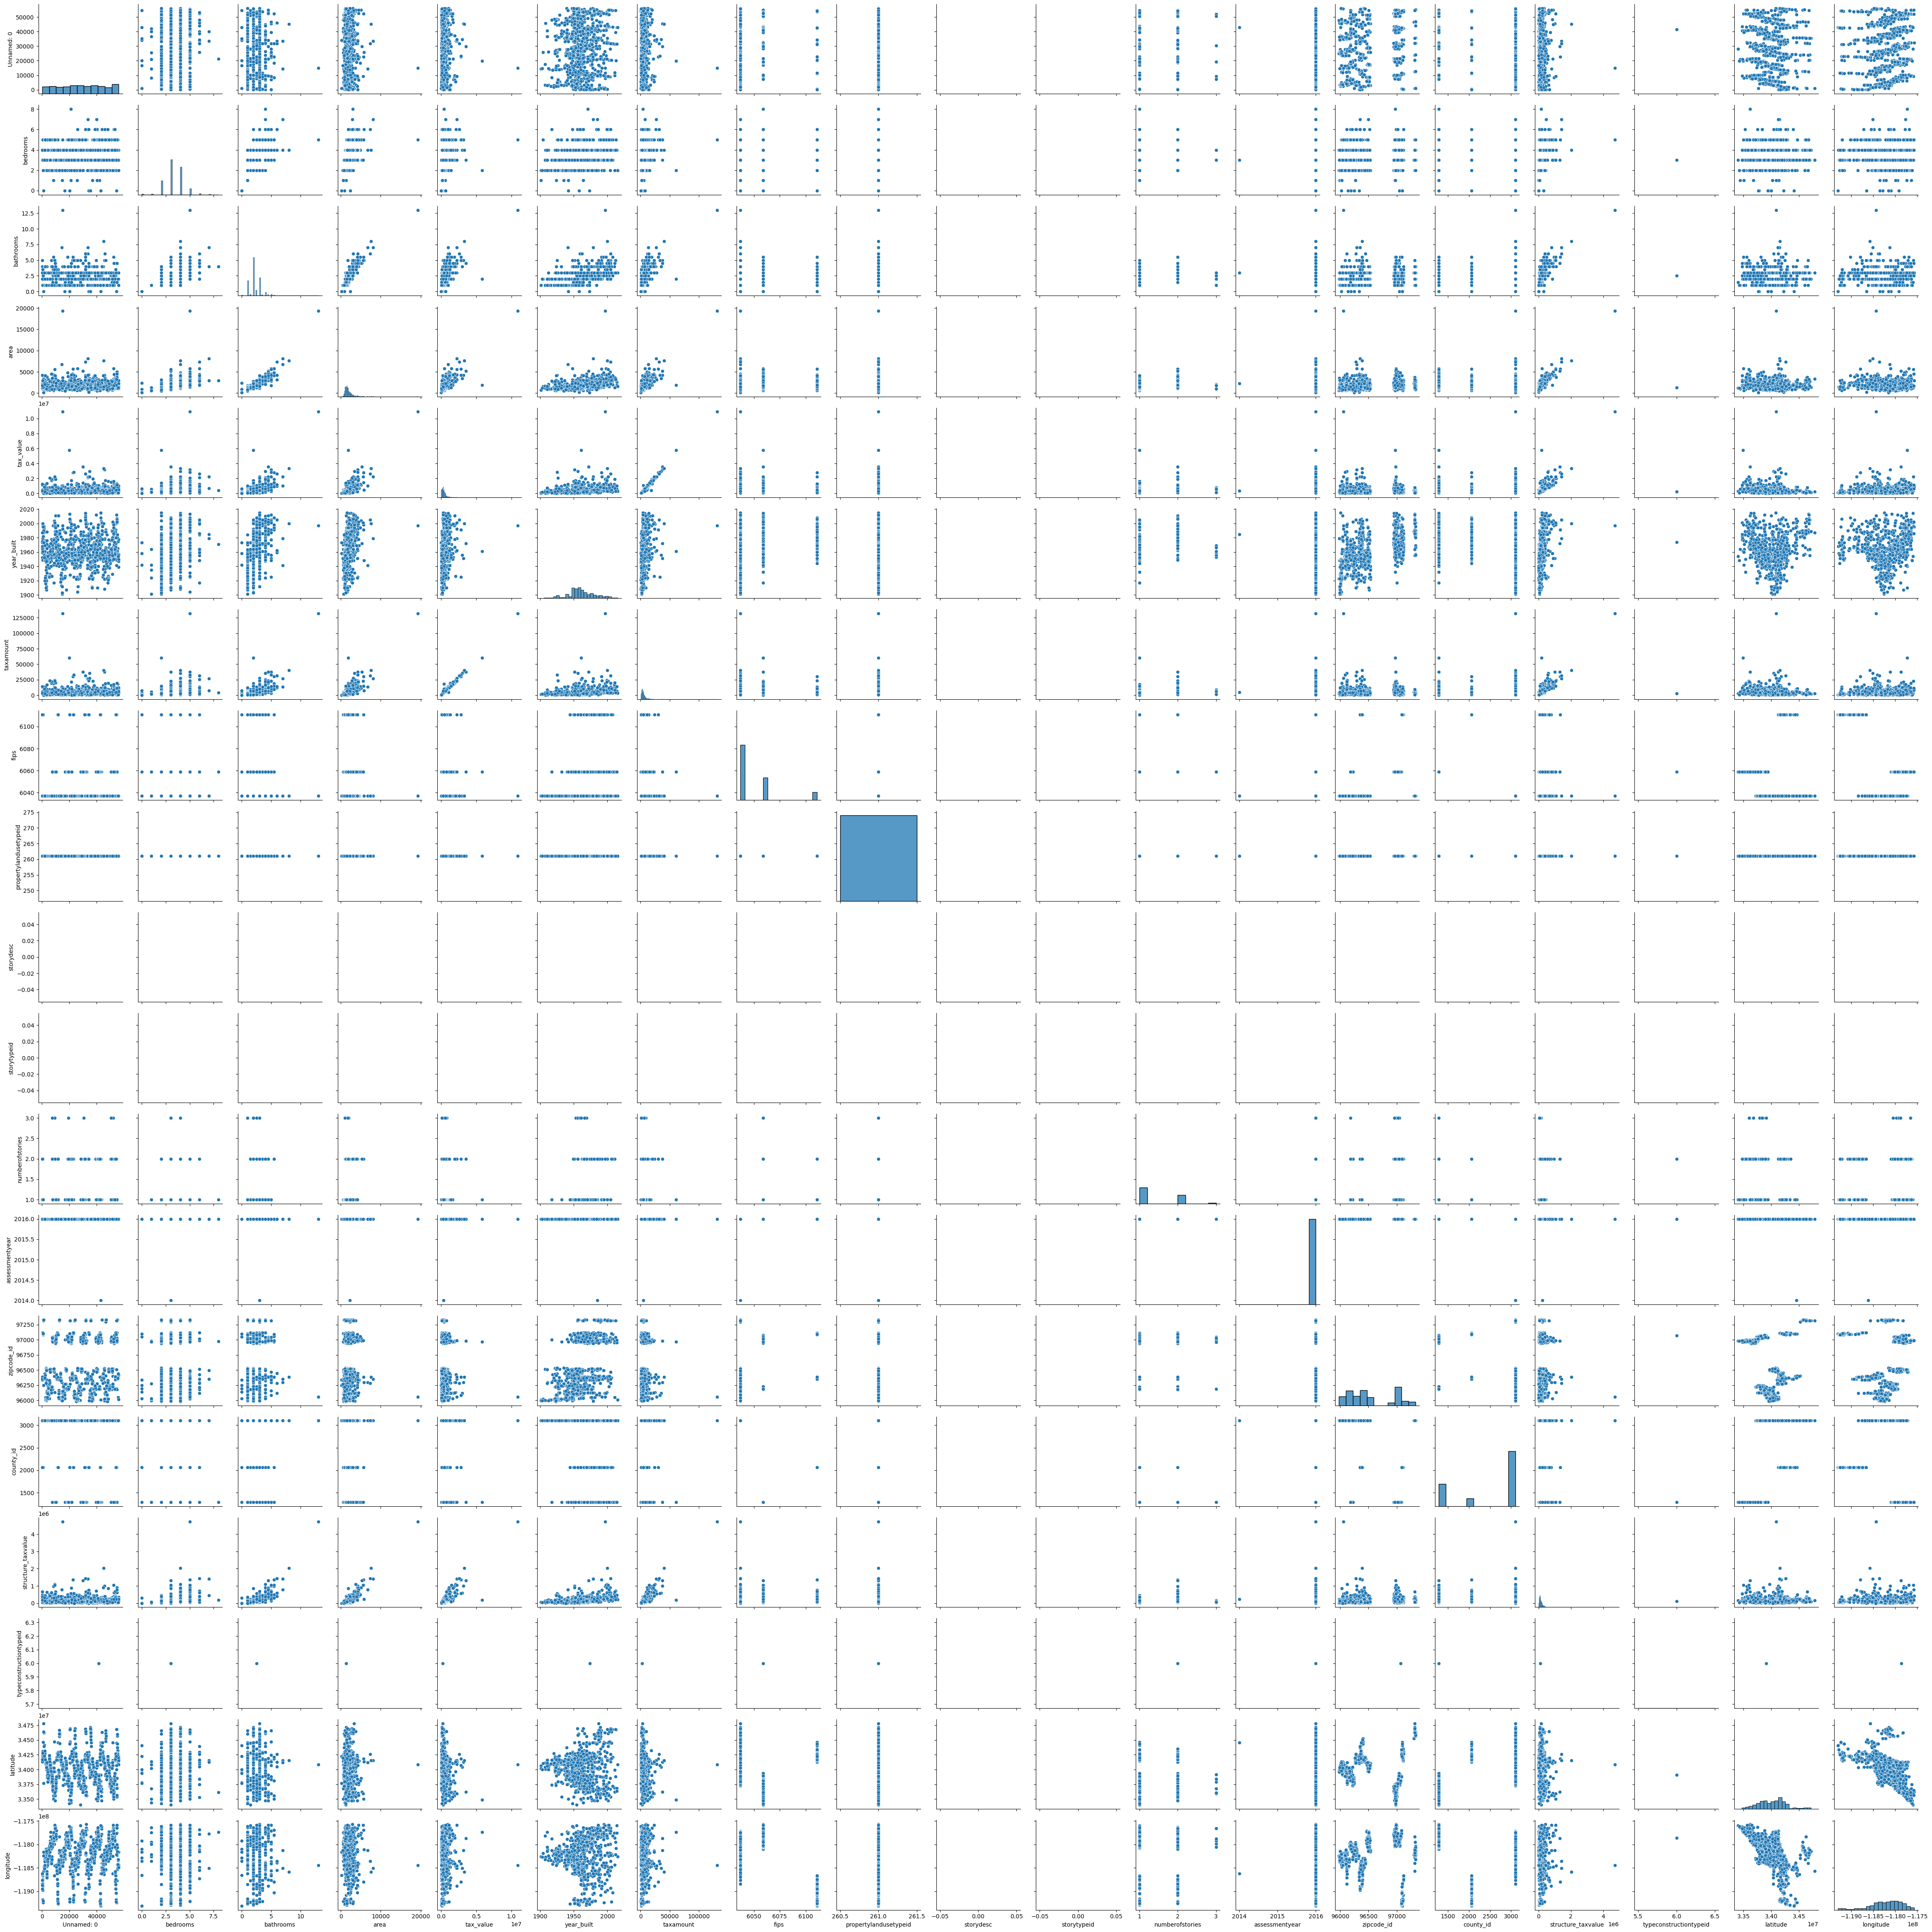

In [10]:
#overview of correlations and data distribution
sns.pairplot(df_sample)

In [11]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [12]:
specific_cols = ['bedrooms', 'bathrooms', 'area', 'taxamount', 'tax_value','zipcode_id']

In [13]:
sns.pairplot(df_sample[specific_cols])

In [14]:
 sns.pairplot(df_sample[specific_cols], kind='reg', diag_kind='kde',plot_kws={'line_kws':{'color':'red'}}) 

In [15]:
sns.catplot(data=df_sample, x='bathrooms', y="area")

In [16]:
sns.catplot(data=df_sample, x='bathrooms', y="bedrooms")

In [17]:
sns.catplot(data=df_sample, x='structure_taxvalue', y="area")

# Preparation 

In [18]:
x = df
x = x.drop(columns='tax_value')


In [19]:
y = df['tax_value']

In [20]:
y = pd.DataFrame(y)
y

,tax_value
0,171289.0
1,193813.0
2,150484.0
3,493678.0
4,57522.0
...,...
56073,115106.0
56074,405689.0
56075,319950.0
56076,293100.0


In [21]:
msno.bar(df)


<AxesSubplot:xlabel='structure_taxvalue', ylabel='area'>

Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.
Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.
Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.
There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.

In [22]:
msno.heatmap(df)

<AxesSubplot:>

In [23]:
missing_values_count = x.isnull().sum()


In [24]:
# how many total missing values do we have?
total_cells = np.product(x.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

22.051738494674346


In [25]:
x.isna().sum() / len(x) * 100

Unnamed: 0                    0.000000
bedrooms                      0.000000
bathrooms                     0.000000
area                          0.410143
year_built                    0.442241
taxamount                     0.230037
fips                          0.000000
propertylandusetypeid         0.000000
propertylandusedesc           0.000000
storydesc                    99.923321
storytypeid                  99.923321
numberofstories              72.372410
assessmentyear                0.000000
zipcode_id                    0.178323
county_id                     0.000000
typeconstructiondesc         99.876957
structure_taxvalue            0.361996
typeconstructiontypeid       99.876957
propertycountylandusecode     0.000000
propertyzoningdesc           33.594279
latitude                      0.000000
longitude                     0.000000
transactiondate               0.000000
dtype: float64

In [26]:
x = x.drop_duplicates()
x.shape

(56078, 23)

In [27]:
# Drop columns with too many missing values for now and reassign; check the shape of my data.
cols_to_drop = ['Unnamed: 0','typeconstructiontypeid', 'typeconstructiondesc', 'storytypeid', 'storydesc'
                ,'propertylandusetypeid','tax_value','longitude','latitude','zipcode_id','county_id','assessmentyear'
               ]
x = df.drop(columns=cols_to_drop)


In [28]:
x[['fips', 'year_built']] = x[['fips', 'year_built']].astype('O')

In [29]:
x['numberofstories']=x['numberofstories'].fillna(x['numberofstories'].mean())
x['area']=x['area'].fillna(x['area'].mean())
x['taxamount']=x['taxamount'].fillna(x['taxamount'].mean())
x['structure_taxvalue']=x['structure_taxvalue'].fillna(x['structure_taxvalue'].mean())

In [31]:
x['propertyzoningdesc'] = x['propertyzoningdesc'].fillna('Unknown')
x['year_built'] = x['year_built'].fillna('Unknown')


In [32]:
x.isna().sum()

bedrooms                     0
bathrooms                    0
area                         0
year_built                   0
taxamount                    0
fips                         0
propertylandusedesc          0
numberofstories              0
structure_taxvalue           0
propertycountylandusecode    0
propertyzoningdesc           0
transactiondate              0
dtype: int64

In [33]:
num_cols = x['numberofstories']=x['numberofstories'].fillna(x['numberofstories'].mean())
x['area']=x['area'].fillna(x['area'].mean())
x['taxamount']=x['taxamount'].fillna(x['taxamount'].mean())
x['structure_taxvalue']=x['structure_taxvalue'].fillna(x['structure_taxvalue'].mean())

In [34]:
cat_cols = x['propertyzoningdesc'] = x['propertyzoningdesc'].fillna('Unknown')
x['year_built'] = x['year_built'].fillna('Unknown')


In [35]:
cat_cols['transactiondate'] = x['transactiondate']

In [36]:
x['fips'] = x['fips'].replace([6037.0, 6059.0,6111.0], ['Los Angeles County, CA', 'Orange County, CA','Ventura County, CA'])


In [37]:
x['fips'].value_counts()

Los Angeles County, CA    37286
Orange County, CA         13972
Ventura County, CA         4820
Name: fips, dtype: int64

In [38]:
x

,bedrooms,bathrooms,area,year_built,taxamount,fips,propertylandusedesc,numberofstories,structure_taxvalue,propertycountylandusecode,propertyzoningdesc,transactiondate
0,2.0,1.0,1058.0,1949.0,2137.34,"Los Angeles County, CA",Single Family Residential,1.38469,52597.0,0100,LAR1,2017-01-09
1,2.0,1.0,802.0,1949.0,2516.25,"Los Angeles County, CA",Single Family Residential,1.38469,116289.0,0100,LAR1,2017-01-09
2,2.0,1.0,804.0,1949.0,1887.91,"Los Angeles County, CA",Single Family Residential,1.38469,90297.0,0100,LAR1,2017-01-09
3,5.0,4.0,2357.0,1950.0,6069.50,"Los Angeles County, CA",Single Family Residential,1.38469,233836.0,0100,LAR1,2017-01-09
4,2.0,1.0,864.0,1955.0,849.46,"Los Angeles County, CA",Single Family Residential,1.38469,20684.0,0100,LAR1,2017-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...
56073,3.0,2.0,1614.0,1954.0,1436.46,"Los Angeles County, CA",Single Family Residential,1.38469,73555.0,0100,LAR1,2017-09-13
56074,3.0,2.0,1422.0,1952.0,4892.51,"Los Angeles County, CA",Single Family Residential,1.38469,98821.0,0100,LAR1,2017-09-13
56075,4.0,2.0,1310.0,1955.0,3867.30,"Los Angeles County, CA",Single Family Residential,1.38469,120968.0,0101,LAR1,2017-09-13
56076,4.0,3.0,2086.0,1949.0,3684.64,"Los Angeles County, CA",Single Family Residential,1.38469,223137.0,0101,LAR1,2017-09-13
